In [40]:
# imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,log_loss
import warnings
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [41]:
hr_df = pd.read_csv(r'..\Cases/human-resources-analytics/HR_comma_sep.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [42]:
X,y = hr_df.drop('left', axis=1),hr_df['left']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
y_train
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder


ohe  = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)),
                              ('passthrough', make_column_selector(dtype_exclude=object)),
                              verbose_feature_names_out=False)
ct = ct.set_output(transform='pandas')
X_trn_ohe = ct.fit_transform(X_train)
X_tst_ohe = ct.fit_transform(X_test)

In [43]:
score = []
depths = [2,3,4,5,6,None]
min_sample = [2,10,20,50,75]
min_leaf = [1,10,20,50,75]
for d in depths:
    for m in min_sample:
        for l in min_leaf:
            dtc = DecisionTreeClassifier(random_state=25,max_depth=d,min_samples_split=m,min_samples_leaf=l)
            dtc.fit(X_trn_ohe,y_train)
            y_pred = dtc.predict(X_tst_ohe)
            y_pred_prob = dtc.predict_proba(X_tst_ohe)
            score.append([d,m,l,accuracy_score(y_test,y_pred),roc_auc_score(y_test, y_pred_prob[:, 1]),log_loss(y_test, y_pred_prob)])

df_scores = pd.DataFrame(score,columns=['depths','min_sample','min_leaf','Accuracy','roc_auc_score','logloss'])
df_scores.sort_values(by='Accuracy',ascending=False)
df_scores.head()

,depths,min_sample,min_leaf,Accuracy,roc_auc_score,logloss
0,2.0,2,1,0.850189,0.913462,0.280939
1,2.0,2,10,0.850189,0.913462,0.280939
2,2.0,2,20,0.850189,0.913462,0.280939
3,2.0,2,50,0.850189,0.913462,0.280939
4,2.0,2,75,0.850189,0.913462,0.280939


In [44]:
best_tree = DecisionTreeClassifier(random_state=25,max_depth=6, min_samples_leaf=1,min_samples_split=20)
best_tree.fit(X_trn_ohe,y_train)
y_pred = best_tree.predict(X_tst_ohe)

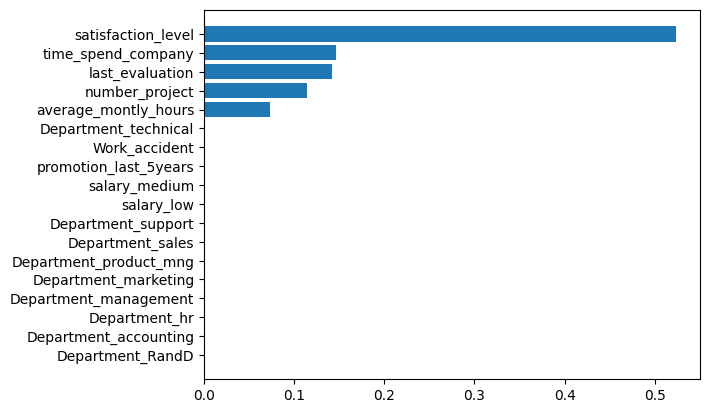

In [45]:
import matplotlib.pyplot as plt
df_imp=pd.DataFrame({'Features':list(X_trn_ohe.columns),
                     'Importance':list(best_tree.feature_importances_)})
df_imp.sort_values('Importance',inplace=True)
plt.barh(df_imp['Features'],df_imp['Importance'])
plt.show()

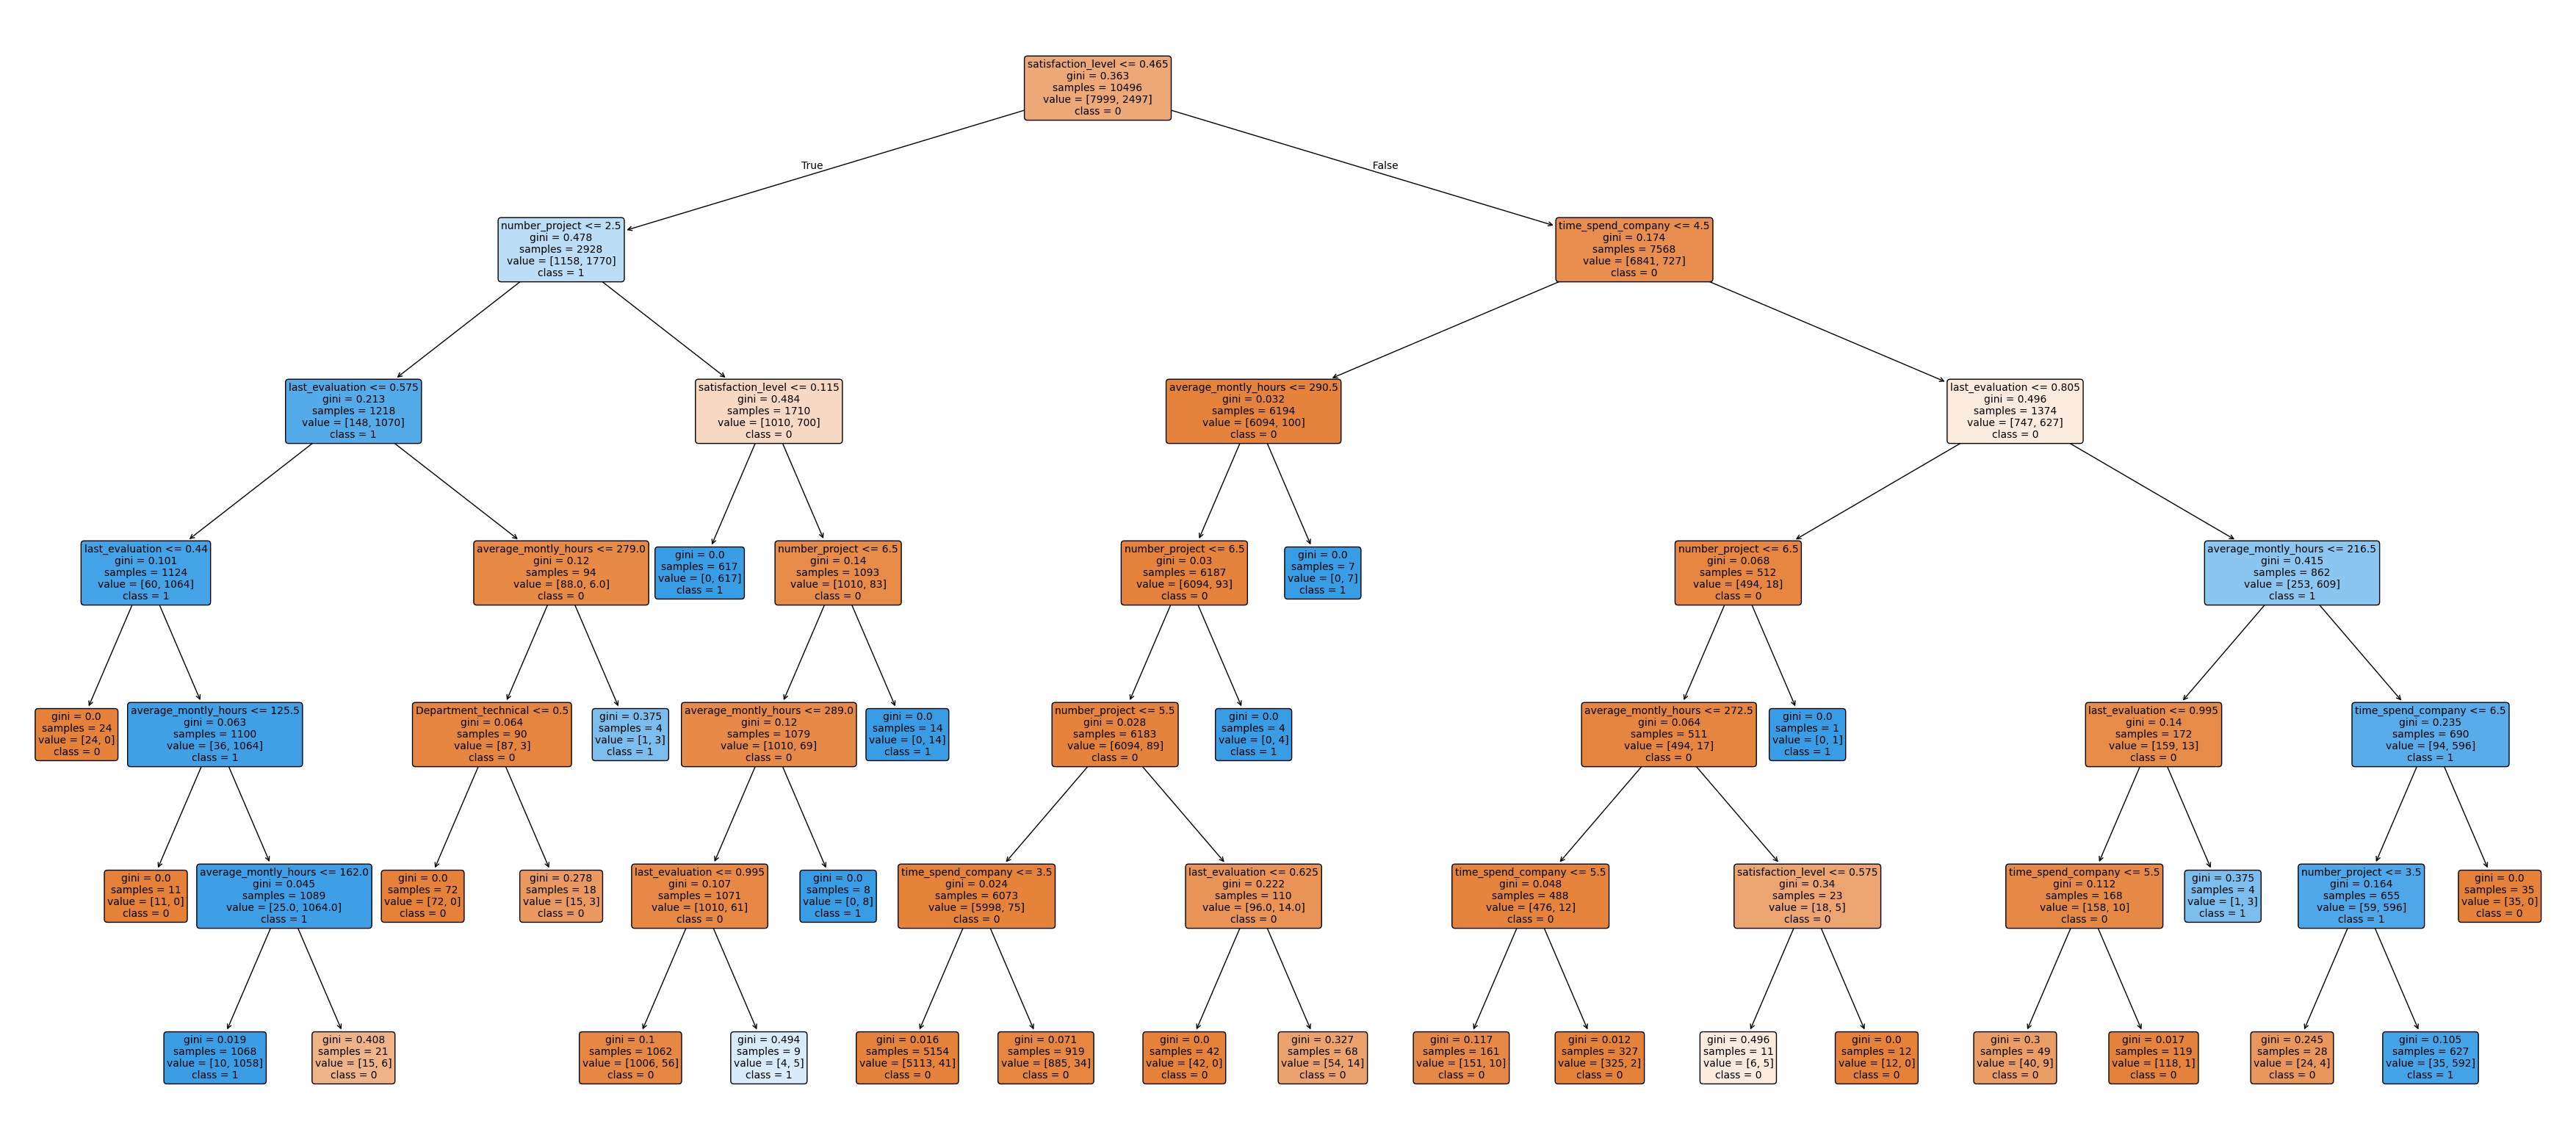

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt

# Assuming 'best_tree' is your trained DecisionTreeClassifier
plt.figure(figsize=(45, 20))  # Adjust figure size as needed
plot_tree(best_tree, 
          feature_names=X_trn_ohe.columns,  # Replace with your feature names
          class_names=['0', '1'],  # Replace with your class labels
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()